# Geolocalización de las encuestas

In [3]:
import os,sys, folium, pandas
here = os.path.abspath('')
sys.path.insert(0, os.path.normpath(os.path.join(here, '../../src')))
import hedera_types as hedera
import odk_interface as odk

# institution data
fondesurco = hedera.mfi(2)
odk_data_dir = '../../_datasets/DataODK/'
odk_survey_folder = ['PEPI_19_03_19/','PEPI_FONDESURCO_19_04_17/']
odk_data_name = [odk_data_dir + odk_survey_folder[0] + 'PEPI_results.csv',
                 odk_data_dir + odk_survey_folder[1] + 
                 'PEPI_FONDESURCO_2_results.csv']
fondesurco.gpsFile = '../../_datasets/Fondesurco/HederaGPS/All.txt'
fondesurco.data_client_file = '../../_datasets/Fondesurco/ClientDatabases/data_with_GPS_3.csv'
data = fondesurco.read_survey(odk_data_name)
HH = odk.households(data)

#Define initial geolocation
initial_location = [-15.2098005, -72.9029974]
map_osm = folium.Map(initial_location, zoom_start=9)
colors = {0: hedera.tier_color(0), 1 : hedera.tier_color(1), 2 : hedera.tier_color(2), 
          3 : hedera.tier_color(3), 4 : hedera.tier_color(4), 5: hedera.tier_color(5)}


## Encuestas por oficina

Fueron encuestados 137 clientes, en 5 diferentes oficinas: Pausa, Orcopampa, Viraco, Cotahuasi, y Cabanillas

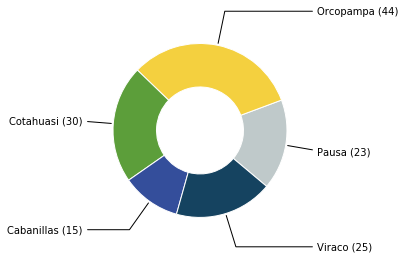

In [4]:
collection_overview = odk.overview(HH,[fondesurco])
fondesurco.plot_collection_overview(collection_overview)

## Geolocalización

In [5]:
HH.apply(lambda row:folium.CircleMarker(location=[row["GPS_Latitude"], row["GPS_Longitude"]],
                                        radius=10,fill_color=colors[row['PEPI_E_Affordability']], 
                                        popup=row['PEPI_E_Affordability']).add_to(map_osm), axis=1)
map_osm